In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv("/content/diabetes.csv")

In [59]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


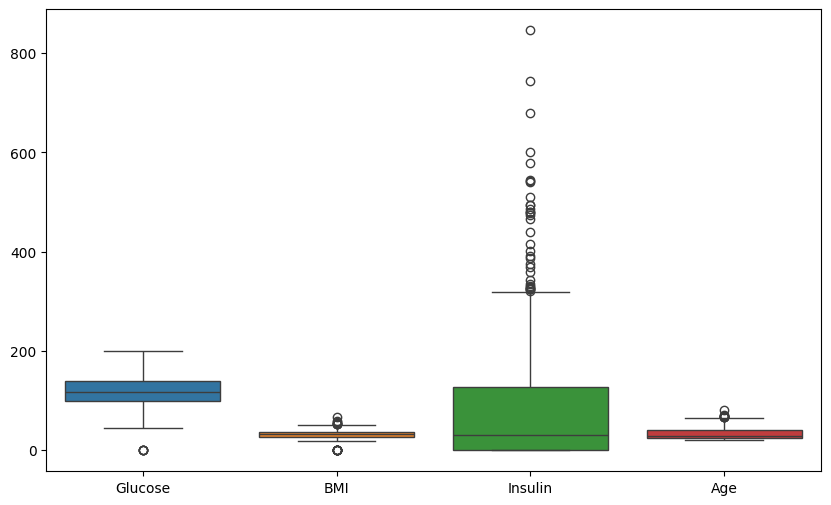

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Glucose', 'BMI', 'Insulin', 'Age']])
plt.show()

In [62]:
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure',
            'SkinThickness', 'Insulin', 'BMI',
            'DiabetesPedigreeFunction', 'Age']

In [63]:
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound,
                 np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

In [64]:
for col in num_cols:
    df = treat_outliers_iqr(df, col)

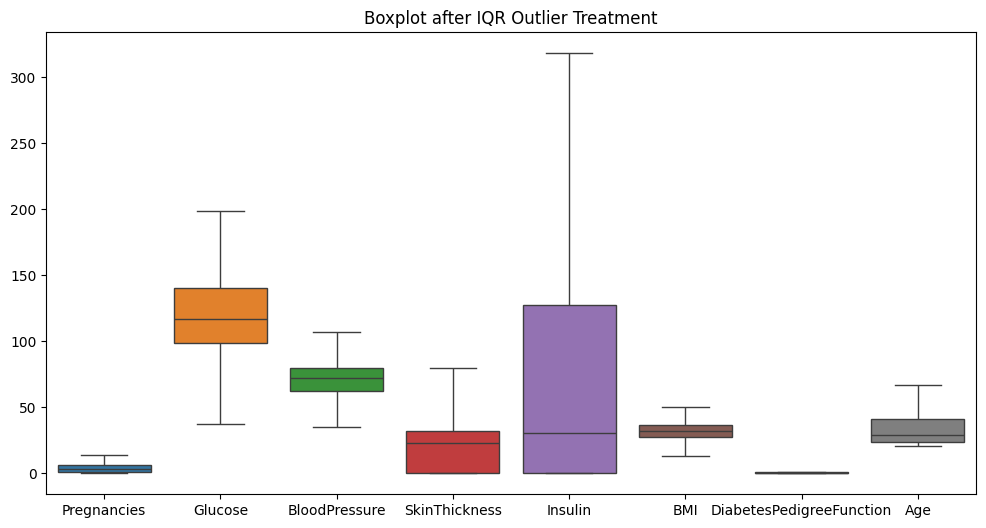

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot after IQR Outlier Treatment")
plt.show()

In [66]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
si = StandardScaler()
X_train_scaled = si.fit_transform(X_train)
X_test_scaled = si.transform(X_test)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [73]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [74]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7012987012987013
ROC-AUC: 0.8227777777777777
